<h2 style = "text-align:center; color:yellow">Proyecto Final Programación</h2>
<h4 style = "text-align:center">Juan José Londoño David - Sergio Gallon</h4>
<p style = "text-align:center">En este proyecto desarrollaremos un modelo de predicción del clima, partiendo de la base de datos abierta del gobierno para sus estaciones metereologicas en la Candelaria Boyacá</p>
<p style = "text-align:center; color:gray">Universidad EIA 2023</p>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression

In [170]:
import pandas as pd
datos = pd.read_csv('./data_files/parameters.csv')
datos.rename(columns={
    'Temperatura 10cm (°C)': 'T (degC)',
    'Fecha y Hora de Inicio (dd/MM/aaaa  HH:mm:ss)': 'hora',
    'Fecha y Hora de Finalización (dd/MM/aaaa  HH:mm:ss)': 'hora_final',
    "PM10 (ug/m3)\nCondición Estándar": 'pm10',
    "Dirección del viento (Grados)": 'wind_direction',
    "Velocidad del Viento (m/s)": "wind_speed",
    "Presión atmosférica (mm Hg)": "pressure_mm_hg",
    "Humedad Relativa 10m (%)": 'humedad'
},inplace=True)
datos = datos.drop(['hora_final', 'Radiación Solar Global (W/m2)', 'Precipitación (mm)'], axis = 1)
datos = datos.drop_duplicates()
datos

,hora,pm10,wind_speed,wind_direction,T (degC),pressure_mm_hg,humedad
0,01/01/2022 12:00:00 AM,17.025539,0.146154,97.266667,23.607692,756.130769,93.948718
1,01/01/2022 01:00:00 AM,14.893095,0.350000,224.278947,22.794737,755.611184,94.444737
2,01/01/2022 02:00:00 AM,11.785741,0.256410,179.684615,22.225641,755.292308,95.258974
3,01/01/2022 03:00:00 AM,16.259467,0.392308,206.848718,22.089744,755.300000,95.138462
4,01/01/2022 04:00:00 AM,18.612182,0.536842,270.278947,21.947368,755.484868,95.357895
...,...,...,...,...,...,...,...
718,01/31/2022 07:00:00 PM,27.458633,2.192105,308.036842,26.184210,757.318421,78.026316
719,01/31/2022 08:00:00 PM,18.178288,2.007895,314.247368,25.902632,757.951974,78.855263
720,01/31/2022 09:00:00 PM,20.717283,1.605128,317.794872,25.620513,758.376923,81.015385
721,01/31/2022 10:00:00 PM,22.872291,1.546154,313.256410,25.443590,758.351923,81.661539


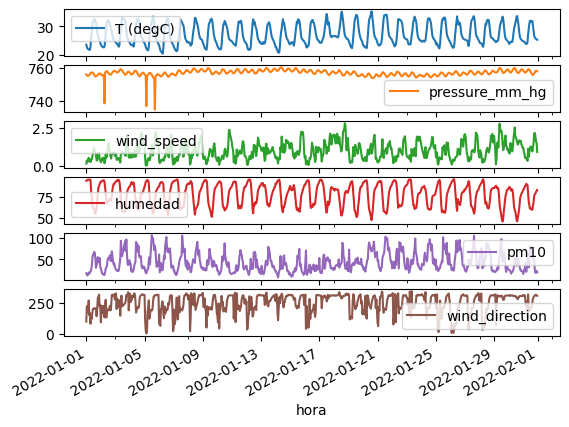

In [176]:
if 'hora' in datos.columns:
    date_time = pd.to_datetime(datos.pop('hora'), format='%m/%d/%Y %I:%M:%S %p')
date_time

##Graficar parametros
plot_cols = ['T (degC)', 'pressure_mm_hg', 'wind_speed', 'humedad', 'pm10', 'wind_direction']
plot_features = datos[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)



<h3 style = "text-align:center">Generamos Las Respectivas Gráficas De Comparación</h3>

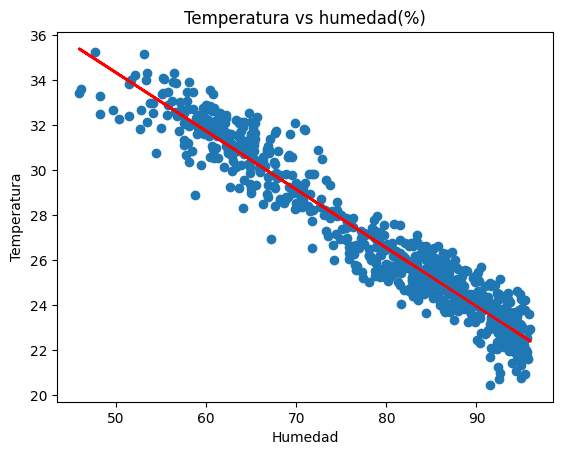

In [185]:
temperatura = datos['T (degC)']
humedad = datos['humedad']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(humedad.values.reshape(-1, 1), temperatura)

# Predicción de temperatura
temperatura_predicha = modelo.predict(humedad.values.reshape(-1, 1))

# Graficar la dispersión de los datos y la recta de regresión
plt.scatter(humedad, temperatura)
plt.plot(humedad, temperatura_predicha, color='red', linewidth=2)
plt.title('Temperatura vs humedad(%)')
plt.xlabel('Humedad')
plt.ylabel('Temperatura')
plt.show()

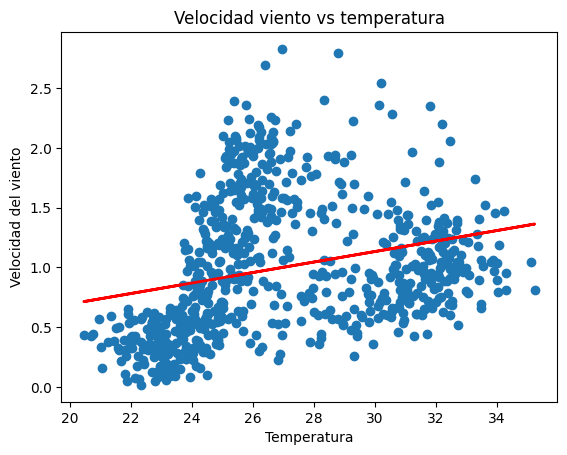

In [186]:
# Datos de entrenamiento
temperatura = datos['T (degC)']
wind_speed = datos['wind_speed']

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(temperatura.values.reshape(-1, 1), wind_speed)

# Predicción de velocidad del viento
wind_speed_predicha = modelo.predict(temperatura.values.reshape(-1, 1))

# Graficar la dispersión de los datos y la recta de regresión
plt.scatter(temperatura, wind_speed)
plt.plot(temperatura, wind_speed_predicha, color='red', linewidth=2)
plt.title('Velocidad viento vs temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Velocidad del viento')
plt.show()

<h3 style = "text-align:center; color: yellow">Generamos la regresión lineal múltiple</h3>

In [187]:
import numpy as np

# Datos de entrenamiento
temperatura = datos['T (degC)']
wind_speed = datos['wind_direction']
humedad = datos['humedad']

# Variable objetivo (temperatura futura)
y = temperatura

# Crear una matriz de características combinando las variables independientes
X = np.column_stack((wind_speed, humedad))

# Crear y ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)
print(modelo)


LinearRegression()


In [190]:
def generarPrediccion():
    # Solicitar la entrada al usuario
    humedad_usuario = float(input("Ingresa la humedad: "))
    wind_speed_usuario = float(input("Ingresa la velocidad del viento: "))

    # Crear la matriz de características para la entrada del usuario
    X_usuario = np.array([[wind_speed_usuario, humedad_usuario]])

    # Predecir el valor de temperatura para la entrada del usuario
    temperatura_predicha = modelo.predict(X_usuario)

    # Imprimir el valor predicho
    print("Humedad: ", humedad_usuario)
    print("Velocidad Del Viento", wind_speed_usuario)
    print("La temperatura predicha es:", temperatura_predicha[0])

In [191]:
generarPrediccion()

Humedad:  10.0
Velocidad Del Viento 0.3
La temperatura predicha es: 45.042203571259066


In [91]:
import tensorflow as tf

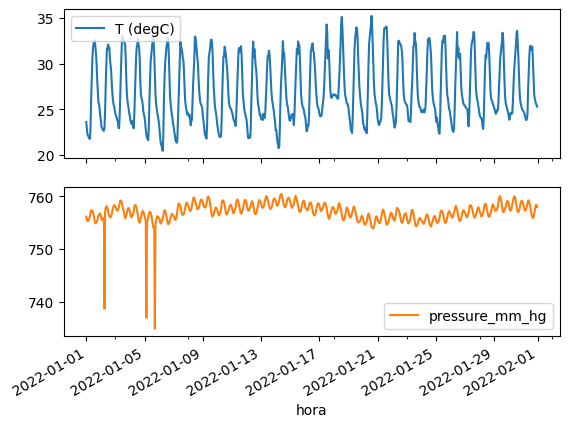

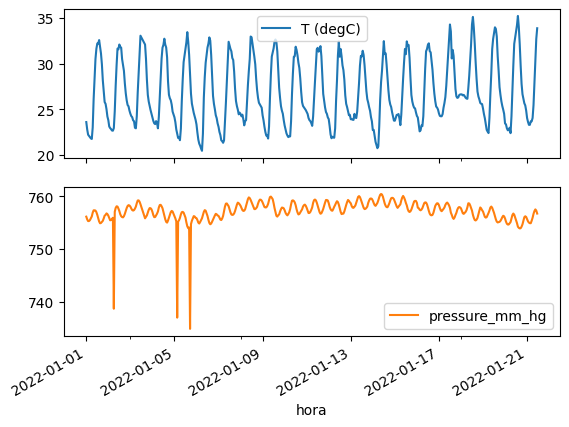

In [92]:
if 'hora' in datos.columns:
    date_time = pd.to_datetime(datos.pop('hora'), format='%m/%d/%Y %I:%M:%S %p')
date_time

##Graficar parametros
plot_cols = ['T (degC)', 'pressure_mm_hg']
plot_features = datos[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = datos[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [93]:
datos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,723.0,42.743138,21.082659,7.165748,26.475222,37.474389,55.057060,106.717664
wind_speed,723.0,1.000658,0.558236,0.015790,0.562821,0.926316,1.385526,2.828205
wind_direction,723.0,247.997925,77.480434,0.326316,204.191363,278.505128,311.258974,347.265789
T (degC),723.0,27.005457,3.459839,20.456410,24.255705,26.023077,30.321795,35.244737
Precipitación (mm),723.0,0.000026,0.000705,0.000000,0.000000,0.000000,0.000000,0.018947
pressure_mm_hg,723.0,757.052811,1.892008,734.871710,756.089891,757.190132,758.153023,760.428947
Humedad Relativa 10m (%),723.0,78.231284,12.854949,45.930769,66.234211,81.552632,89.521186,95.984615
Radiación Solar Global (W/m2),723.0,137.168542,229.993073,0.000000,0.000000,0.748718,143.239744,786.402564


<h3>Dividimos los datos en entrenamiento, test y evaluación</h3>

In [94]:
column_indices = {name: i for i, name in enumerate(datos.columns)}

n = len(datos)
train_df = datos[0:int(n*0.7)]
val_df = datos[int(n*0.7):int(n*0.9)]
test_df = datos[int(n*0.9):]
num_features = datos.shape[1]
train_df

,pm10,wind_speed,wind_direction,T (degC),Precipitación (mm),pressure_mm_hg,Humedad Relativa 10m (%),Radiación Solar Global (W/m2)
0,17.025539,0.146154,97.266667,23.607692,0.0,756.130769,93.948718,0.000000
1,14.893095,0.350000,224.278947,22.794737,0.0,755.611184,94.444737,0.000000
2,11.785741,0.256410,179.684615,22.225641,0.0,755.292308,95.258974,0.000000
3,16.259467,0.392308,206.848718,22.089744,0.0,755.300000,95.138462,0.000000
4,18.612182,0.536842,270.278947,21.947368,0.0,755.484868,95.357895,0.000000
...,...,...,...,...,...,...,...,...
501,28.252503,1.130769,165.202564,32.530769,0.0,757.326923,64.741026,728.733333
502,90.227896,1.094737,214.347368,32.365789,0.0,756.984868,65.597368,721.281579
503,86.286216,1.161539,211.225641,32.158974,0.0,756.257692,64.933333,693.958974
504,87.546995,0.915385,202.179487,32.117949,0.0,755.690385,63.833333,577.820513


<h3>Normalizamos los datos para hacer más eficiente el entrenamiento</h3>

In [95]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<h3>Como estamos usando RNN (Redes Neuronales Recurrentes) debemos usar window </h3>

In [96]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [97]:
w1 = WindowGenerator(input_width=24, label_width=1, shift=24,
                     label_columns=['T (degC)'])
w1

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [47]
Label column name(s): ['T (degC)']

In [98]:
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
w2

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']

In [99]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [100]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 8)
Inputs shape: (3, 6, 8)
Labels shape: (3, 1, 1)


In [101]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [102]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [103]:
w2.train.element_spec


(TensorSpec(shape=(None, 6, 8), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [104]:
for example_inputs, example_labels in w2.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 8)
Labels shape (batch, time, features): (32, 1, 1)


<h3>Creación Del Modelo</h3>

In [105]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['T (degC)']

In [106]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 8)
Labels shape (batch, time, features): (32, 1, 1)


In [107]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [108]:
baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

5/5 [==============================] - 0s 2ms/step - loss: 0.1162 - mean_absolute_error: 0.2573


In [109]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [110]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 8)
Output shape: (32, 1, 1)


In [111]:
from tensorflow import keras
from tensorflow.keras import layers


In [114]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['T (degC)'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['T (degC)']

In [115]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=1):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [116]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/20
16/16 [==============================] - 0s 9ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/20
5/5 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan


### convolution 

In [122]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

In [124]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)


4/4 [==============================] - 0s 2ms/step - loss: nan - mean_absolute_error: nan
